<div style="line-height: 0.4;">
    <h1 style="color: green; font-weight: bold; text-align: center;"></h1>
    <h1 style="color: green; font-weight: bold; text-align: center;">PROCESO DE WIENNER</h1>
    <h3 style="color: darkolivegreen; font-weight: bold; text-align: center;">CURSO 4 (PROCESOS ESTOCÁSTICOS 2)</h3>
    <h5 style="color: darkolivegreen; font-weight: bold; text-align: center;">PARTE 4 / LECCIÓN 1</h5>
</div>

<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 1</h4>

<h3>Simulación de un movimiento browniano estándar</h3> 

Simula una trayectoria de movimiento browniano estándar en el intervalo [0,1] con 500 pasos y grafica la trayectoria.

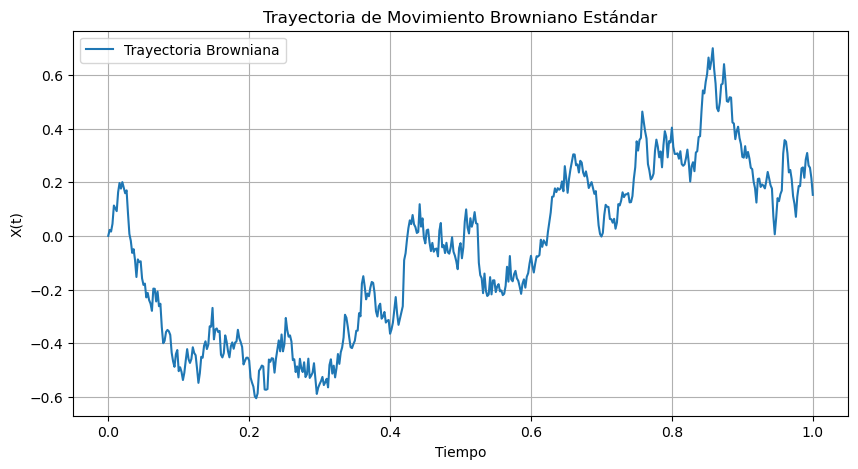

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
T = 1.0        # Tiempo total
N = 500        # Número de pasos
dt = T / N     # Tamaño del paso
t = np.linspace(0, T, N + 1)

# Simulación de una trayectoria
np.random.seed(42)
dW = np.sqrt(dt) * np.random.randn(N)
W = np.concatenate(([0], np.cumsum(dW)))  # Añadir X(0) = 0

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(t, W, label='Trayectoria Browniana')
plt.title('Trayectoria de Movimiento Browniano Estándar')
plt.xlabel('Tiempo')
plt.ylabel('X(t)')
plt.grid()
plt.legend()
plt.show()

<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 2</h4>

Simula 1000 trayectorias de movimiento browniano estándar en el intervalo [0,1] con 500 pasos y grafica la distribución del valor final X(1). Verifica que sigue una distribución normal N(0,1).

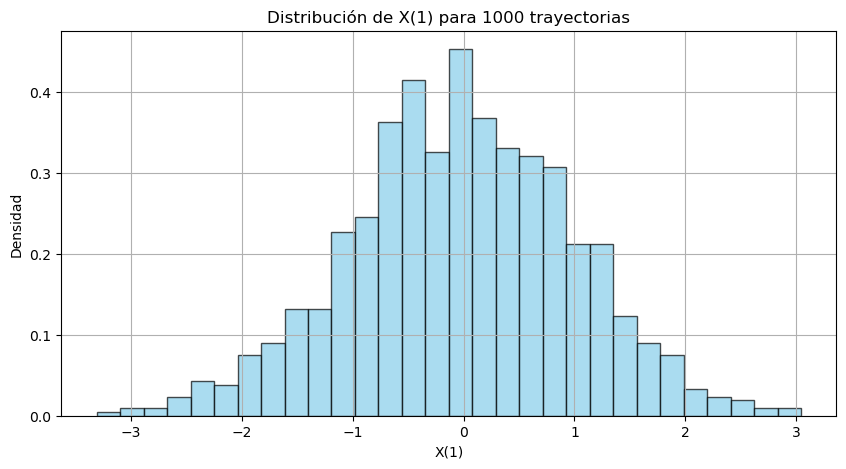

In [2]:
M = 1000  # Número de trayectorias
X_T = np.zeros(M)

for i in range(M):
    dW = np.sqrt(dt) * np.random.randn(N)
    W = np.cumsum(dW)
    X_T[i] = W[-1]  # Valor final de cada trayectoria

# Histograma de X(1)
plt.figure(figsize=(10, 5))
plt.hist(X_T, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de X(1) para 1000 trayectorias')
plt.xlabel('X(1)')
plt.ylabel('Densidad')
plt.grid()
plt.show()

<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 3</h4>

Calcula la *varianza empírica* de X(t) en distintos tiempos t = {0.25, 0.5, 0.75, 1} simulando 1000 trayectorias y verifica que se aproxima a t.

In [3]:
times = [0.25, 0.5, 0.75, 1.0]
indices = [int(ti * N) for ti in times]
values = np.zeros((M, len(times)))

for i in range(M):
    dW = np.sqrt(dt) * np.random.randn(N)
    W = np.concatenate(([0], np.cumsum(dW)))  # Añadir X(0) = 0
    for j, idx in enumerate(indices):
        values[i, j] = W[idx]

# Calcular varianza empírica
var_empirical = np.var(values, axis=0)

# Mostrar resultados
for ti, var in zip(times, var_empirical):
    print(f"Varianza empírica en t = {ti}: {var:.4f} (valor teórico: {ti})")

Varianza empírica en t = 0.25: 0.2663 (valor teórico: 0.25)
Varianza empírica en t = 0.5: 0.5010 (valor teórico: 0.5)
Varianza empírica en t = 0.75: 0.7658 (valor teórico: 0.75)
Varianza empírica en t = 1.0: 1.0749 (valor teórico: 1.0)
